# **Basics of Probability**

1. Write a Python program to simulate the following scenarios:  
  a. Tossing a coin 10,000 times and calculating the experimental probability of heads and tails.  
  b. Rolling two dice and computing the probability of getting a sum of 7.  

In [ ]:
#1a.
import random

def toss(trials):
  heads=0;
  tails=0;
  for _ in range(trials):
    toss=random.choice(['H','T'])
    if toss == 'H':
      heads += 1
    else:
      tails += 1
  print(f"Total Tosses: {trials}")
  print(f"Heads: {heads} ({heads/trials:.4f})")
  print(f"Tails: {tails} ({tails/trials:.4f})")


if __name__ == "__main__":
  trials=10000
  toss(trials)



Total Tosses: 10000
Heads: 5054 (0.5054)
Tails: 4946 (0.4946)


In [ ]:
#1b.

def roll_dice(trials):
  sum=0
  for _ in range (trials):
    dice1=random.randint(1,6)
    dice2=random.randint(1,6)
    if dice1+dice2==7:
      sum+=1
  prop = sum/trials
  print(f"Total Tosses: {trials}")
  print(f"Sum of 7: {sum} ({prop:.4f})")

if __name__ == "__main__":
  trials=10000
  roll_dice(trials)


Total Tosses: 10000
Sum of 7: 1685 (0.1685)


2. Write a function to estimate the probability of getting at least one "6" in 10 rolls of a fair die.

In [ ]:
def roll_dice(trials):
  sum=0
  for _ in range (trials):
    if 6 in [random.randint(1,6)for _ in range(10)]:
      sum+=1
  prop = sum/trials
  print(f"Total roll: {trials}")
  print(f"at least 6: {sum} ({prop:.4f})")

  theoretical_prob = 1 - (5/6) ** 10
  print(f"Theoretical probability: {theoretical_prob:.4f}")


if __name__ == "__main__":
  trials=10000
  roll_dice(trials)

Total roll: 10000
at least 6: 8321 (0.8321)
Theoretical probability: 0.8385


# **Conditional Probability and Bayes' Theorem**


3. A bag contains 5 red, 7 green, and 8 blue balls. A ball is drawn randomly, its color noted, and it is put back into the bag. If this process is repeated 1000 times, write a Python program to estimate:  
  a. The probability of drawing a red ball given that the previous ball was blue.  
  b. Verify Bayes' theorem with the simulation results.  


In [ ]:
import random
from collections import Counter

def draw(trials):
  bag = ['R']*5+['G']*7+['B']*8
  seq=[random.choice(bag)for _ in range(trials)]

  cnt_prev_blue=0
  cnt_red_prev_blue=0

  for i in range(1,trials):
    if seq[i-1]=='B':
      cnt_prev_blue+=1
      if seq[i]=='R':
        cnt_red_prev_blue+=1

  conditional_prob = cnt_red_prev_blue/cnt_prev_blue if cnt_prev_blue else 0 # Calculate and assign to conditional_prob
  print(f"Probability of drawing a red ball given that the previous ball was blue: {conditional_prob}")

  counts = Counter(seq)
  P_B = counts['B'] / trials
  P_R = counts['R'] / trials

# Count how many times a Red follows, and Blue precedes it
  count_red = 0
  count_blue_before_red = 0
  for i in range(1, trials):
      if seq[i] == 'R':
          count_red += 1
          if seq[i - 1] == 'B':
              count_blue_before_red += 1

  P_B_given_R = count_blue_before_red / count_red if count_red else 0
  bayes_result = (P_B_given_R * P_R) / P_B if P_B else 0

  print(f"Using Bayes: P(R|B) ≈ {bayes_result:.4f}")
  print(f"Difference from simulation: {abs(conditional_prob - bayes_result):.4f}")


if __name__ == '__main__':
  trials=1000
  draw(trials)

Probability of drawing a red ball given that the previous ball was blue: 0.23357664233576642
Using Bayes: P(R|B) ≈ 0.2336
Difference from simulation: 0.0000


# **Random Variables and Discrete Probability**

4. Generate a sample of size 1000 from a discrete random variable with the following distribution:  
  - P(X=1) = 0.25  
  - P(X=2) = 0.35  
  - P(X=3) = 0.4  

In [ ]:
import numpy as np
from scipy import stats

def centralTendency(size):
  value=[1,2,3]
  prob=[0.25,0.35,0.40]

  sample=np.random.choice(value,size,p=prob)
  mean1=np.mean(sample)
  median1=np.median(sample)
  mode1 = stats.mode(sample, keepdims=True)[0][0]

  print(f"mean :{mean1:.4f}")
  print(f"median :{median1:.4f}")
  print(f"mode :{mode1:.4f}")

  #print(f"Mode: {stats.mode(sample)[0][0]}")


if __name__ == '__main__':
  size=1000
  centralTendency(size)

mean :2.1930
median :2.0000
mode :3.0000


# **Continuous Random Variables**

5. Simulate 2000 random samples from an exponential distribution with a mean of 5. Visualize the distribution using:  
  a. A histogram.  
  b. A probability density function (PDF) overlay.  

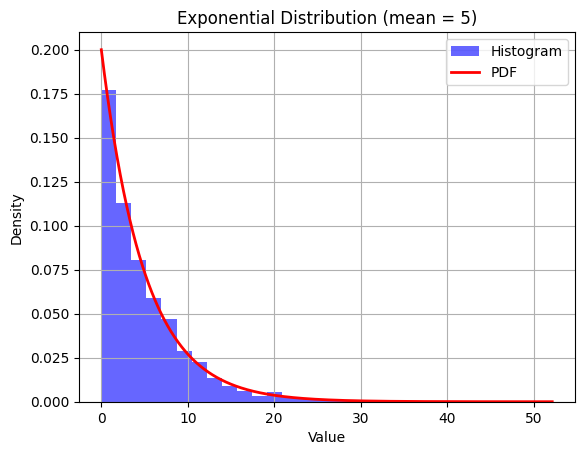

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

def simulate_exponential(size):
  mean=5

  scale=mean
  data=np.random.exponential(scale,size)

  plt.hist(data,bins=30,density=True,alpha=0.6,color='b',label='Histogram')

  #Overlaying PDF

  X=np.linspace(0,np.max(data),1000)
  pdf=expon.pdf(X,scale=scale)
  plt.plot(X,pdf,color='r',linewidth=2,label='PDF')
  plt.title('Exponential Distribution (mean = 5)')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.legend()
  plt.grid(True)
  plt.show()


if __name__ == '__main__':
  size=2000
  simulate_exponential(size)






# **Central Limit Theorem**


6. Simulate the Central Limit Theorem by following these steps  
  a. Generate 10,000 random numbers from a uniform distribution.  
  b. Draw 1000 samples of size n = 30.  
  c. Calculate and visualize the distribution of sample means.  


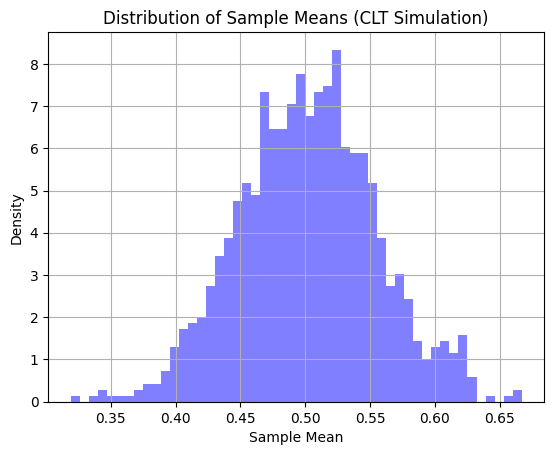

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_clt():
    population = np.random.uniform(low=0, high=1, size=10000)

    sample_means_list = []
    for _ in range(1000):
        sample = np.random.choice(population, size=30, replace=True)
        sample_means_list.append(np.mean(sample))

    plt.hist(sample_means_list, bins=50, density=True, alpha=0.5, color='blue')
    #plt.xlim(0.3, 0.7 )
    #plt.ylim(0, 10)
    plt.title("Distribution of Sample Means (CLT Simulation)")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

simulate_clt()